# HW 6_2 - Tim Demetriades
10/8/2021

### Test CNN over the cifar10 data set, which contains 32x32 colour images from 10 classes:
### 1. Use the below code to load the data set.

In [1]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print("Train samples:", x_train.shape, y_train.shape)
print("Test samples:", x_test.shape, y_test.shape)

Train samples: (50000, 32, 32, 3) (50000, 1)
Test samples: (10000, 32, 32, 3) (10000, 1)


### 2. Show the 10 classes.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

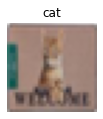

In [3]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer",  "dog", "frog", "horse", "ship", "truck"]

# show random images from train
cols = 8
rows = 2

fig = plt.figure(figsize=(2 * cols - 1, 2.5 * rows - 1))

for i in range(cols):
  for j in range(rows):
    random_index = np.random.randint(0, len(y_train))
    ax = fig.add_subplot(rows, cols, i * rows + j + 1)
    ax.grid('off')
    ax.axis('off')
    ax.imshow(x_train[random_index, :])
    ax.set_title(cifar10_classes[y_train[random_index, 0]])
    plt.show()

### 3. Define a CNN architecture and train your own model by playing with the network setup: like, performs convolution, performs 2D max pooling, changing activation function from ReLU to LeakyReLU, adding dropout etc. 

In [4]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import SparseCategoricalCrossentropy

In [5]:
# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255
x_test = x_test / 255

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3)))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
#model.add(Activation('relu'))
model.add(LeakyReLU(alpha=0.05))
model.add(Dropout(0.2))
model.add(Dense(10))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          1

In [8]:
model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 13s 7ms/step - loss: 1.5027 - accuracy: 0.4506 - val_loss: 1.2213 - val_accuracy: 0.5606
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1293 - accuracy: 0.6009 - val_loss: 1.0648 - val_accuracy: 0.6250
Epoch 3/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9643 - accuracy: 0.6620 - val_loss: 1.0339 - val_accuracy: 0.6479
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8577 - accuracy: 0.6981 - val_loss: 0.9430 - val_accuracy: 0.6738
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7756 - accuracy: 0.7266 - val_loss: 0.9483 - val_accuracy: 0.6793
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7159 - accuracy: 0.7479 - val_loss: 0.8436 - val_accuracy: 0.7109
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6552 - accuracy: 0.7700 - val_loss: 0.8406 - val_ac

In [10]:
score = model.evaluate(x_test, y_test)
print()
print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8644 - accuracy: 0.7235

Test Loss:  0.8644274473190308
Test accuracy:  0.7235000133514404


In [11]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

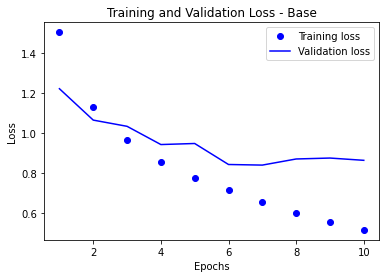

In [13]:
# Plotting Loss
loss_values = history_dict['loss']
acc_values = history_dict['accuracy']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

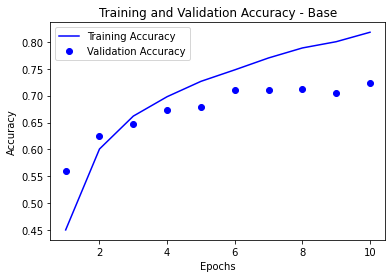

In [14]:
# Plotting Accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.plot(epochs, acc_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'bo', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
print(f'Training Loss: {round(loss_values[-1], 4)}')
print(f'Testing Loss: {round(val_loss_values[-1], 4)}')
print(f'Training Accuracy: {round(acc_values[-1], 4)}')
print(f'Testing Accuracy: {round(val_acc_values[-1], 4)}')

Training Loss: 0.5176
Testing Loss: 0.8644
Training Accuracy: 0.8178
Testing Accuracy: 0.7235


### Results/Analysis
Above you can see the results from our model. This model was a CNN model that used a mixture of convolution, activation (leaky relu), max pooling, dropout, and dense hidden layers.

After 10 epochs the model obtained a testing loss of 0.82 and a testing accuracy of 72.35%. These are pretty respectable values given the dataset and the model used. Above you can see two graphs. The first shows the training and validation losses, of which you can see both decrease over time as expected. The second graph shows the training and validation accuracies, both of which increased as expected.

A couple things good be used to improve the model even further. The hyperparameters can of course be tuned, such as increasing the number of nodes and alpha of the leaky relu activation function. Additionally, more hidden layers could be added. Overall, though, this model performed relatively well as is.